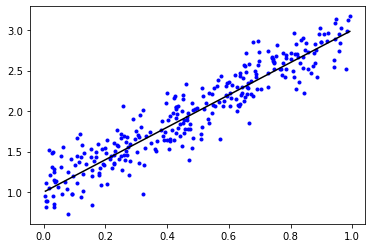

In [1]:
import numpy.random as npr
import jax.numpy as np
from jax import grad
import matplotlib.pyplot as plt

# first generate some random data
X = npr.uniform(0, 1, 300)
true_w, true_b = 2, 1
# add some noise to the labels
Y = X*true_w + true_b + 0.2*npr.randn(300)

plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b, color='black')
plt.show()

(DeviceArray(1.959847, dtype=float32), DeviceArray(1.0362778, dtype=float32))


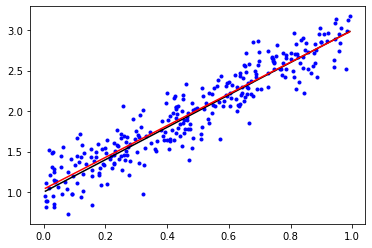

In [2]:
# the linear model
def linear(params, x):
    w,b = params
    return w*x + b

def loss(params, dataset):
    x, y = dataset
    pred = linear(params, x)
    return np.square(pred - y).mean()

# gradient function
loss_grad = grad(loss)

iterations = 500
step_size = 0.1
dataset = (X, Y)
w, b = 1.5, 2. # initial values for the parameters
for i in range(iterations):
    params = (w, b)
    loss_ = loss(params, dataset)
    # compute gradient w.r.t model parameters
    params_grad = loss_grad(params, dataset)
    # update parameters
    w -= step_size * params_grad[0]
    b -= step_size * params_grad[1]
    #print(loss_)

print(params)
    
plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b, color='black')
plt.plot(np.sort(X), linear(params, np.sort(X)), color='red')
plt.show()

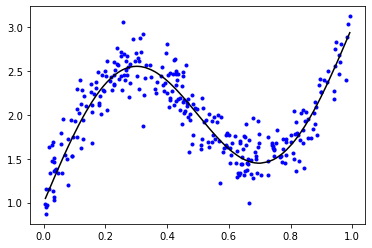

In [3]:
#add some nonlinearity
Y += np.sin(2*np.pi*X)

plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b + np.sin(2*np.pi*np.sort(X)), color='black')
plt.show()

(DeviceArray(-0.07126385, dtype=float32), DeviceArray(2.0146625, dtype=float32))


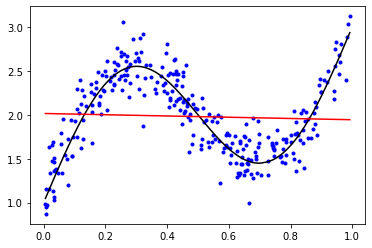

In [4]:
iterations = 500
step_size = 0.1
dataset = (X, Y)
w, b = 1.5, 2. # initial values for the parameters
for i in range(iterations):
    params = (w, b)
    loss_ = loss(params, dataset)
    # compute gradient w.r.t model parameters
    params_grad = loss_grad(params, dataset)
    # update parameters
    w -= step_size * params_grad[0]
    b -= step_size * params_grad[1]
    #print(loss_)

print(params)
    
plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b + np.sin(2*np.pi*np.sort(X)), color='black')
plt.plot(np.sort(X), linear(params, np.sort(X)), color='red')
plt.show()

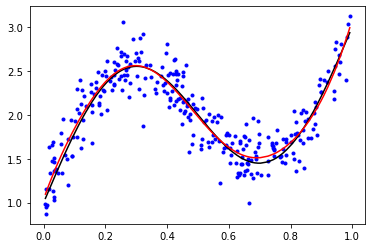

In [19]:
from sklearn import linear_model

idx = np.argsort(X)

# encoder
Z = np.concatenate([X[idx].reshape(-1, 1)**n for n in range(1, 10)], axis=1)

# ridge regression
reg = linear_model.Ridge(alpha=1e-8)
reg.fit(Z, Y[idx])

plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b + np.sin(2*np.pi*np.sort(X)), color='black')
plt.plot(X[idx], reg.predict(Z), color='red')
plt.show()